<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_2_2_%D0%9D%D0%B5%D0%B7%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%B0%D0%BD%D0%B0_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D0%B8%D1%84%D1%96%D0%BA%D0%B0%D1%86%D1%96%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому ДЗ ми потренуємось розв'язувати задачу багатокласової класифікації за допомогою логістичної регресії з використанням стратегій One-vs-Rest та One-vs-One, оцінити якість моделей та порівняти стратегії.

### Опис задачі і даних

**Контекст**

В цьому ДЗ ми працюємо з даними про сегментацію клієнтів.

Сегментація клієнтів – це практика поділу бази клієнтів на групи індивідів, які схожі між собою за певними критеріями, що мають значення для маркетингу, такими як вік, стать, інтереси та звички у витратах.

Компанії, які використовують сегментацію клієнтів, виходять з того, що кожен клієнт є унікальним і що їхні маркетингові зусилля будуть більш ефективними, якщо вони орієнтуватимуться на конкретні, менші групи зі зверненнями, які ці споживачі вважатимуть доречними та які спонукатимуть їх до купівлі. Компанії також сподіваються отримати глибше розуміння уподобань та потреб своїх клієнтів з метою виявлення того, що кожен сегмент цінує найбільше, щоб точніше адаптувати маркетингові матеріали до цього сегменту.

**Зміст**.

Автомобільна компанія планує вийти на нові ринки зі своїми існуючими продуктами (P1, P2, P3, P4 і P5). Після інтенсивного маркетингового дослідження вони дійшли висновку, що поведінка нового ринку схожа на їхній існуючий ринок.

На своєму існуючому ринку команда з продажу класифікувала всіх клієнтів на 4 сегменти (A, B, C, D). Потім вони здійснювали сегментовані звернення та комунікацію з різними сегментами клієнтів. Ця стратегія працювала для них надзвичайно добре. Вони планують використати ту саму стратегію на нових ринках і визначили 2627 нових потенційних клієнтів.

Ви маєте допомогти менеджеру передбачити правильну групу для нових клієнтів.

В цьому ДЗ використовуємо дані `customer_segmentation_train.csv`[скачати дані](https://drive.google.com/file/d/1VU1y2EwaHkVfr5RZ1U4MPWjeflAusK3w/view?usp=sharing). Це `train.csv`з цього [змагання](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation/data?select=train.csv)

**Завдання 1.** Завантажте та підготуйте датасет до аналізу. Виконайте обробку пропущених значень та необхідне кодування категоріальних ознак. Розбийте на тренувальну і тестувальну вибірку, де в тесті 20%. Памʼятаємо, що весь препроцесинг ліпше все ж тренувати на тренувальній вибірці і на тестувальній лише використовувати вже натреновані трансформери.
Але в даному випадку оскільки значень в категоріях небагато, можна зробити обробку і на оригінальних даних, а потім розбити - це простіше. Можна також реалізувати процесинг і тренування моделі з пайплайнами. Обирайте як вам зручніше.

In [1]:
!pip install opendatasets

In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_segmentation_train.csv')

In [7]:
df.dtypes

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [8]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


ROC AUC (Train): 0.76
              precision    recall  f1-score   support

           A       0.43      0.49      0.46      1578
           B       0.39      0.23      0.28      1486
           C       0.51      0.59      0.55      1576
           D       0.65      0.70      0.67      1814

    accuracy                           0.51      6454
   macro avg       0.49      0.50      0.49      6454
weighted avg       0.50      0.51      0.50      6454



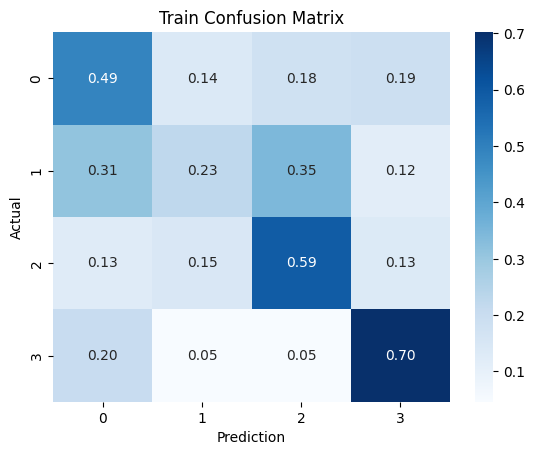

ROC AUC (Validation): 0.77
              precision    recall  f1-score   support

           A       0.42      0.44      0.43       394
           B       0.42      0.25      0.31       372
           C       0.51      0.59      0.55       394
           D       0.65      0.74      0.69       454

    accuracy                           0.52      1614
   macro avg       0.50      0.51      0.50      1614
weighted avg       0.51      0.52      0.51      1614



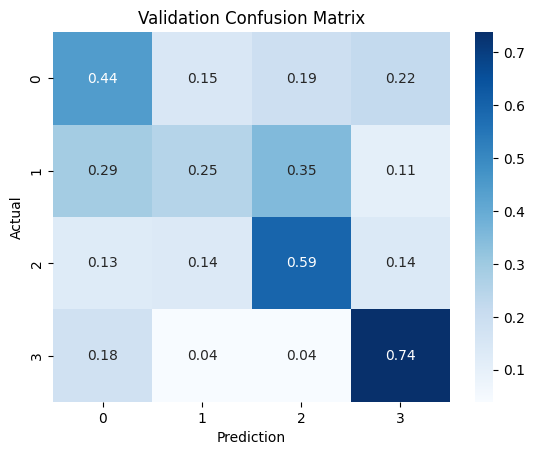

Модель збережено як 'model.joblib'


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Завантаження датасету
file_path = "/content/drive/MyDrive/Colab Notebooks/customer_segmentation_train.csv"
df = pd.read_csv(file_path)

# Визначення цільової змінної
target_col = 'Segmentation'
input_cols = [col for col in df.columns if col != target_col]

# Розбиття на тренувальний та валідаційний набори
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df[target_col], random_state=42)
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()

# Визначення числових та категоріальних ознак
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# Імпутація пропущених значень
for df_ in [train_inputs, val_inputs]:
    df_[numeric_cols] = df_[numeric_cols].fillna(df_[numeric_cols].median())
    df_[categorical_cols] = df_[categorical_cols].fillna(df_[categorical_cols].mode().iloc[0])

# Побудова трансформерів
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Створення моделі
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Функція для оцінки моделі
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    proba = model.predict_proba(inputs)
    roc_auc = roc_auc_score(targets, proba, multi_class="ovr")

    print(f"ROC AUC ({name}): {roc_auc:.2f}")
    print(classification_report(targets, preds))

    cm = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.show()

    return preds

# Навчання моделі
model_pipeline.fit(train_inputs, train_targets)

# Оцінка
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name="Train")
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name="Validation")

# Збереження моделі
joblib.dump(model_pipeline, 'model.joblib')
print("Модель збережено як 'model.joblib'")


**Завдання 2. Важливо уважно прочитати все формулювання цього завдання до кінця!**

Застосуйте методи ресемплингу даних SMOTE та SMOTE-Tomek з бібліотеки imbalanced-learn до тренувальної вибірки. В результаті у Вас має вийти 2 тренувальних набори: з апсемплингом зі SMOTE, та з ресамплингом з SMOTE-Tomek.

Увага! В нашому наборі даних є як категоріальні дані, так і звичайні числові. Базовий SMOTE не буде правильно працювати з категоріальними даними, але є його модифікація, яка буде. Тому в цього завдання є 2 виконання

  1. Застосувати SMOTE базовий лише на НЕкатегоріальних ознаках.

  2. Переглянути інформацію про метод [SMOTENC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) і використати цей метод в цій задачі. За цей спосіб буде +3 бали за це завдання і він рекомендований для виконання.

  **Підказка**: аби скористатись SMOTENC треба створити змінну, яка містить індекси ознак, які є категоріальними (їх номер серед колонок) і передати при ініціації екземпляра класу `SMOTENC(..., categorical_features=cat_feature_indeces)`.
  
  Ви також можете розглянути варіант використання варіації SMOTE, який працює ЛИШЕ з категоріальними ознаками [SMOTEN](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)

In [15]:
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Копії препроцесованих даних
X_train = train_inputs.copy()
y_train = train_targets.copy()

# Перевіримо баланс класів до ресемплінгу
print("Before resampling:")
print(y_train.value_counts())

# Отримаємо індекси категоріальних колонок (для SMOTENC)
cat_feature_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

# 1. SMOTE (тільки на числових ознаках)
smote = SMOTE(random_state=42)

X_train_numeric = X_train[numeric_cols]
y_train_numeric = y_train.copy()

X_smote, y_smote = smote.fit_resample(X_train_numeric, y_train_numeric)

print("\nAfter SMOTE (numeric only):")
print(y_smote.value_counts())


# 2. SMOTENC (числові + категоріальні ознаки)
# Кодуємо категоріальні ознаки в числові
# Не OneHot, бо SMOTENC працює з LabelEncoded/ordinal ознаками, тобто просто числові категорії

from sklearn.preprocessing import OrdinalEncoder

X_train_enc = X_train.copy()
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])

smotenc = SMOTENC(
    categorical_features=cat_feature_indices,
    random_state=42
)

X_smotenc, y_smotenc = smotenc.fit_resample(X_train_enc, y_train)

print("\nAfter SMOTENC:")
print(y_smotenc.value_counts())


# 3. SMOTE-Tomek (на основі SMOTENC)

smotetomek = SMOTETomek(
    smote=SMOTENC(categorical_features=cat_feature_indices, random_state=42),
    random_state=42
)

X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train_enc, y_train)

print("\nAfter SMOTE-Tomek:")
print(y_smotetomek.value_counts())


Before resampling:
Segmentation
D    1814
A    1578
C    1576
B    1486
Name: count, dtype: int64

After SMOTE (numeric only):
Segmentation
A    1814
B    1814
C    1814
D    1814
Name: count, dtype: int64

After SMOTENC:
Segmentation
A    1814
B    1814
C    1814
D    1814
Name: count, dtype: int64

After SMOTE-Tomek:
Segmentation
C    1402
D    1395
B    1286
A    1259
Name: count, dtype: int64


**Завдання 3**.
  1. Навчіть модель логістичної регресії з використанням стратегії One-vs-Rest з логістичною регресією на оригінальних даних, збалансованих з SMOTE, збалансованих з Smote-Tomek.  
  2. Виміряйте якість кожної з натренованих моделей використовуючи `sklearn.metrics.classification_report`.
  3. Напишіть, яку метрику ви обрали для порівняння моделей.
  4. Яка модель найкраща?
  5. Якщо немає суттєвої різниці між моделями - напишіть свою гіпотезу, чому?

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, f1_score

# Функція тренування та оцінки моделі
def train_and_evaluate(X_train, y_train, X_val, y_val, label=''):
    clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    report = classification_report(y_val, y_pred, output_dict=True)
    print(f"\n Classification Report for {label}")
    print(classification_report(y_val, y_pred))
    f1_macro = report['macro avg']['f1-score']
    return f1_macro

# 1. Оригінальні тренувальні дані (без ресемплінгу)
# Підготовка трансформера для OneHot
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Препроцесинг
X_train_transformed = preprocessor.fit_transform(train_inputs)
X_val_transformed = preprocessor.transform(val_inputs)

# Тренування
f1_orig = train_and_evaluate(X_train_transformed, train_targets, X_val_transformed, val_targets, label='Original Data')

# 2. SMOTE (числові ознаки)
# Валідні фічі: беремо тільки numeric і знову трансформуємо val set
X_val_numeric = val_inputs[numeric_cols].copy()
X_val_numeric = MinMaxScaler().fit(X_val_numeric).transform(X_val_numeric)

f1_smote = train_and_evaluate(X_smote, y_smote, X_val_numeric, val_targets, label='SMOTE (numeric only)')

# 3. SMOTE-Tomek (з SMOTENC)
# Валідні фічі теж мають бути закодовані так само
X_val_enc = val_inputs.copy()
X_val_enc[categorical_cols] = ordinal_encoder.transform(X_val_enc[categorical_cols])
X_val_enc_scaled = MinMaxScaler().fit_transform(X_val_enc)

f1_smotetomek = train_and_evaluate(X_smotetomek, y_smotetomek, X_val_enc_scaled, val_targets, label='SMOTE-Tomek (SMOTENC)')


# Порівняння
results = pd.DataFrame({
    'Model': ['Original', 'SMOTE (numeric)', 'SMOTE-Tomek'],
    'F1-macro': [f1_orig, f1_smote, f1_smotetomek]
})

print("\n F1-macro порівняння моделей:")
print(results.sort_values('F1-macro', ascending=False))



 Classification Report for Original Data
              precision    recall  f1-score   support

           A       0.43      0.47      0.45       394
           B       0.40      0.17      0.24       372
           C       0.48      0.61      0.54       394
           D       0.65      0.76      0.70       454

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.48      1614
weighted avg       0.50      0.51      0.49      1614



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to con


 Classification Report for SMOTE (numeric only)
              precision    recall  f1-score   support

           A       0.36      0.06      0.10       394
           B       0.00      0.00      0.00       372
           C       0.25      0.99      0.40       394
           D       0.00      0.00      0.00       454

    accuracy                           0.26      1614
   macro avg       0.15      0.26      0.13      1614
weighted avg       0.15      0.26      0.12      1614



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


 Classification Report for SMOTE-Tomek (SMOTENC)
              precision    recall  f1-score   support

           A       0.38      0.26      0.31       394
           B       0.32      0.36      0.34       372
           C       0.46      0.59      0.51       394
           D       0.66      0.61      0.63       454

    accuracy                           0.46      1614
   macro avg       0.45      0.45      0.45      1614
weighted avg       0.46      0.46      0.46      1614


 F1-macro порівняння моделей:
             Model  F1-macro
0         Original  0.480303
2      SMOTE-Tomek  0.448253
1  SMOTE (numeric)  0.125675


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not hav

Найкраща модель — Original (без ресемплінгу)

F1-macro = 0.48, що вище, ніж у будь-якої моделі з ресемплінгом.
Модель зі SMOTE-Tomek не дала покращення, а базовий SMOTE (на числових ознаках) взагалі сильно погіршив якість.

SMOTE (numeric only):
Він працює лише з числовими ознаками і ігнорує категоріальні, які можуть бути критично важливими для класифікації.
Результат — створення "штучних", некоректних зразків → погана генералізація.

SMOTENC / SMOTE-Tomek:
Хоч і враховує категоріальні фічі, але:
Створює синтетичні зразки, які можуть не відображати реальний розподіл.
Модель (логістична регресія) не має достатньої складності, щоб адаптуватися до цих нових патернів.
Можливо, справжній дисбаланс класів був не критичним і підсилення меншості не принесло користі.